<a href="https://colab.research.google.com/github/jcoch1/lighthouse-data-notes/blob/master/deep_learning_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Learning Challenge

### Loading the CIFAR10 data
The data can be found directly in the package keras (`keras.datasets.cifar10`).

```python
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
```

In [25]:
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

### Task
Build the neural network (CNN) to predict the object in the images. Try to do it on your own first before consulting peers or the tutorials on the internet. If you are stuck early, reach out to our mentors who will point you in the right direction.

In [26]:
print(train_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 1)


Image (#100): Which is digit '[8]'


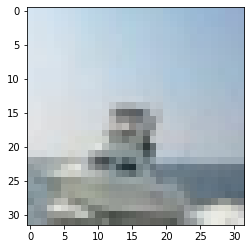

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
digit = 100 # Change to choose new article
a = train_images[digit]
plt.imshow(a, cmap='gray', interpolation='nearest')
print("Image (#{}): Which is digit '{}'".format(digit,train_labels[digit]))

<Figure size 432x288 with 0 Axes>

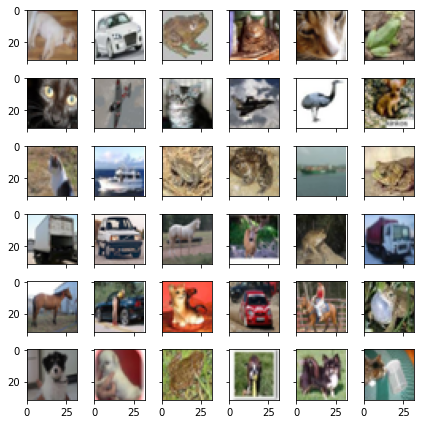

In [28]:
import random

ROWS = 6
random_indices = random.sample(range(train_images.shape[0]), ROWS*ROWS)

sample_images = train_images[random_indices, :]

plt.clf()

fig, axes = plt.subplots(ROWS,ROWS, 
                         figsize=(ROWS,ROWS),
                         sharex=True, sharey=True) 

for i in range(ROWS*ROWS):
    subplot_row = i//ROWS 
    subplot_col = i%ROWS
    ax = axes[subplot_row, subplot_col]

    plottable_image = np.reshape(sample_images[i,:], (32,32,3))
    ax.imshow(plottable_image, cmap='gray_r')
    
    ax.set_xbound([0,32])

plt.tight_layout()
plt.show()

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [30]:
#Initializing the CNN
classifier = Sequential()

#Step 1 - Convolution
classifier.add(Convolution2D(32,3,3, input_shape=(32,32,3), activation='relu'))

#Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size=(2,2)))

#Step 3 - Flattening
classifier.add(Flatten())

#Step 4 - Full connection
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(10, activation='sigmoid'))

#Compiling the CNN
classifier.compile(optimizer='adam', metrics=['accuracy'])

In [31]:
x_train = train_images
x_test = test_images
y_train = train_labels
y_test = test_labels
# input image dimensions
img_rows, img_cols = 32, 32
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)

In [32]:
# convert class vectors to binary class matrices
num_classes=10
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

In [33]:
input_shape = (img_rows, img_cols, 3)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [24]:
import tensorflow as tf
import time

start_time = time.time()

model.fit(x_train, y_train,
          batch_size=16,
          epochs=12,
          verbose=2,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/12
3125/3125 - 188s - loss: 1.8386 - accuracy: 0.3288 - val_loss: 1.5152 - val_accuracy: 0.4495
Epoch 2/12
3125/3125 - 189s - loss: 1.5943 - accuracy: 0.4322 - val_loss: 1.3498 - val_accuracy: 0.5138
Epoch 3/12
3125/3125 - 189s - loss: 1.4595 - accuracy: 0.4876 - val_loss: 1.3652 - val_accuracy: 0.5155
Epoch 4/12
3125/3125 - 189s - loss: 1.3780 - accuracy: 0.5187 - val_loss: 1.2167 - val_accuracy: 0.5840
Epoch 5/12
3125/3125 - 189s - loss: 1.3121 - accuracy: 0.5427 - val_loss: 1.2142 - val_accuracy: 0.5808
Epoch 6/12
3125/3125 - 191s - loss: 1.2579 - accuracy: 0.5653 - val_loss: 1.1652 - val_accuracy: 0.5912
Epoch 7/12
3125/3125 - 191s - loss: 1.2132 - accuracy: 0.5792 - val_loss: 1.2301 - val_accuracy: 0.5786
Epoch 8/12
3125/3125 - 189s - loss: 1.1879 - accuracy: 0.5880 - val_loss: 1.1833 - val_accuracy: 0.5982
Epoch 9/12
3125/3125 - 189s - loss: 1.1551 - accuracy: 0.6030 - val_loss: 1.1853 - val_accuracy: 0.5980
Epoch 10/12
3125/3125 - 188s - loss: 1.1257 - accuracy: 0.6086 -

NameError: ignored